In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import sys
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_excel(r'C:\Users\EONEHYD031\Downloads\Dataset.xlsx')

In [3]:
df.replace('#NULL!',np.nan,inplace=True)

In [4]:
df['totalcardspend']=df['cardspent']+df['card2spent']

In [5]:
from time import strptime
def tomonth(x):
    month_name= x
    month_number=strptime(month_name, '%B').tm_mon
    return month_number

df['birthmonth']=df['birthmonth'].map(lambda x: tomonth(x))

In [6]:
df['birthmonth']=df['birthmonth'].apply(lambda x: float(x))

In [7]:
df.drop(['lncardten','lnwiremon','lnwireten'],axis=1,inplace=True)

In [8]:
df.drop('lncardmon',axis=1,inplace=True)

In [23]:
cat=df[['custid','region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','empcat',
        'retire','inccat',
         'default','jobsat','marital','spousedcat','homeown','hometype','addresscat',
        'carown','cartype',
         'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle',
        'commutecarpool',
         'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor',
        'telecommute','reason',
         'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee',
        'cardtenurecat',
         'card2','card2type','card2benefit','card2fee','card2tenurecat','active','bfast'
        ,'churn','tollfree',
         'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward'
        ,'confer','ebill',
         'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01'
        ,'response_02',
         'response_03']]

In [24]:
num=df[['custid','age','ed','income','lninc','debtinc','creddebt','lncreddebt','othdebt','lnothdebt',
 'spoused','reside','pets','pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small',
'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items',
 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten','tollmon','lntollmon','tollten',
 'lntollten','equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 
 'cardten', 'wiremon',  'wireten', 'hourstv','employ','cardspent','card2spent',
  'address','cars','cardtenure','card2tenure','totalcardspend']]

In [25]:
cat.isnull().sum()

custid               0
region               0
townsize             2
gender               0
agecat               0
birthmonth           0
edcat                0
jobcat               0
union                0
empcat               0
retire               0
inccat               0
default              0
jobsat               0
marital              0
spousedcat           0
homeown              0
hometype             0
addresscat           0
carown               0
cartype              0
carcatvalue          0
carbought            0
carbuy               0
commute              0
commutecat           0
commutecar           0
commutemotorcycle    0
commutecarpool       0
commutebus           0
                    ..
card2tenurecat       0
active               0
bfast                0
churn                0
tollfree             0
equip                0
callcard             0
wireless             0
multline             0
voice                0
pager                0
internet             0
callid     

In [26]:
mode=cat['townsize'].mode()
mode

0    1.0
dtype: float64

In [27]:
cat.dropna(subset=['townsize'],axis=0,inplace=True)

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
cat.isnull().sum().value_counts()

0    80
dtype: int64

In [29]:
num.isnull().sum()

custid               0
age                  0
ed                   0
income               0
lninc                0
debtinc              0
creddebt             0
lncreddebt           1
othdebt              0
lnothdebt            1
spoused              0
reside               0
pets                 0
pets_cats            0
pets_dogs            0
pets_birds           0
pets_reptiles        0
pets_small           0
pets_saltfish        0
pets_freshfish       0
carvalue             0
commutetime          2
carditems            0
card2items           0
tenure               0
longmon              0
lnlongmon            0
longten              3
lnlongten            3
tollmon              0
lntollmon         2622
tollten              0
lntollten         2622
equipmon             0
lnequipmon        3296
equipten             0
lnequipten        3296
cardmon              0
cardten              2
wiremon              0
wireten              0
hourstv              0
employ               0
cardspent  

In [30]:
num.drop(['lntollmon','lntollten','lnequipmon','lnequipten'],axis=1,inplace=True)

In [36]:
num.dropna(subset=['lnothdebt'],axis=0,inplace=True)

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
num.drop('totalcardspend',axis=1,inplace=True)

In [95]:
num.columns

Index(['custid', 'age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime',
       'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten',
       'lnlongten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon',
       'cardten', 'wiremon', 'wireten', 'hourstv', 'employ', 'cardspent',
       'card2spent', 'address', 'cars', 'cardtenure', 'card2tenure',
       'totalspendln'],
      dtype='object')

In [96]:
Q1=num.totalspendln.quantile(0.01)
Q2=num.totalspendln.quantile(0.99)
Q3=num.totalspendln.min()
Q4=num.totalspendln.max()
print(Q1)
print(Q2)
print(Q3)
print(Q4)
num['totalspendln']=num['totalspendln'].clip(lower=Q1,upper=Q2)

4.0638651456349075
7.473100489962317
4.06359665327332
7.473442200235362


In [97]:
#merging both on custid
df=pd.merge(num,cat,on='custid')

In [98]:
df.drop('custid',axis=1,inplace=True)

In [99]:
#numerical data along with dummied categorical data-dumm
dumm = pd.get_dummies(data=df,columns=['region', 'townsize', 'gender', 'agecat', 'birthmonth',
       'edcat', 'jobcat', 'union', 'empcat', 'retire', 'inccat', 'default',
       'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'addresscat',
       'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute',
       'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool',
       'commutebus', 'commuterail', 'commutepublic', 'commutebike',
       'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview',
       'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit',
       'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit',
       'card2fee', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree',
       'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager',
       'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv',
       'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame',
       'ownfax', 'news', 'response_01', 'response_02', 'response_03'],drop_first=True)

In [100]:
pp.ProfileReport(dumm)

In [101]:
dumm.shape

(4994, 216)

In [102]:
dumm.drop('card2tenure',axis=1,inplace=True)

In [103]:
dumm.drop('cardtenure',axis=1,inplace=True)

In [104]:
dumm.drop('commutecat_2',axis=1,inplace=True)

In [105]:
dumm.drop('commutecat_4',axis=1,inplace=True)

In [106]:
dumm.drop('commutecat_5',axis=1,inplace=True)

In [107]:
dumm.drop('equip_1',axis=1,inplace=True)

In [108]:
dumm.drop('wireless_1',axis=1,inplace=True)

In [109]:
dumm.drop('longten',axis=1,inplace=True)

In [110]:
dumm.drop(['lninc','lncreddebt','lnothdebt','lnlongmon','lnlongten',],axis=1,inplace=True)

In [112]:
pp.ProfileReport(dumm)

In [111]:
dumm.drop('marital_1',axis=1,inplace=True)

In [113]:
def calculate_vif_(df, thresh=5.0):
    variables = list(range(df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(df.iloc[:, variables].values, ix)
               for ix in range(df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(df.columns[variables])
    return df.iloc[:, variables]

In [114]:
dfvif=calculate_vif_(dumm)

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'carown_0' at index: 98
dropping 'cartype_0' at index: 99
dropping 'carcatvalue_1' at index: 100
dropping 'commute_4' at index: 107
dropping 'totalspendln' at index: 36
dropping 'ed' at index: 1
dropping 'spoused' at index: 5
dropping 'pets' at index: 6
dropping 'age' at index: 0
dropping 'owntv_1' at index: 180
dropping 'cardtenurecat_5' at index: 146
dropping 'tenure' at index: 16
dropping 'address' at index: 29
dropping 'tollmon' at index: 17
dropping 'income' at index: 0
dropping 'carvalue' at index: 11
dropping 'commutetime' at index: 11
dropping 'owncd_1' at index: 175
dropping 'employ' at index: 22
dropping 'carditems' at index: 11
dropping 'cardmon' at index: 16
dropping 'ownvcr_1' at index: 170
dropping 'agecat_6' at index: 35
dropping 'hourstv' at index: 19
dropping 'wiremon' at index: 17
dropping 'card2tenurecat_5' at index: 148
dropping 'carbought_0' at index: 85
dropping 'owndvd_1' at index: 165
dropping 'polview_4' at index: 112
dropping 'card2items' at index: 11

In [115]:
#F regression
def select_kbest_reg(data_frame, target, k=5):
    """
    Selecting K-Best features regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

In [117]:
dfvif['totalspendln']=dumm['totalspendln']

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
dfvif['carditems']=dumm['carditems']

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
dfvif['card2items']=dumm['card2items']

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
dfvif['cardspent']=dumm['cardspent']

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
dfreg=dfvif[['othdebt','carcatvalue_3','creddebt','inccat_5','retire_1','inccat_4','reason_2',
              'card_2','card_3','inccat_3','agecat_5','wireten','carcatvalue_2','card2_3','tollten','equipten','agecat_4',
              'gender_1','totalspendln','card2_2','jobcat_2','card_4','ownpda_1','hometype_2','ownfax_1','response_03_1',
              'card_4','inccat_2','pager_1','card2_4','callwait_1','callid_1','internet_4','vote_1','confer_1','edcat_4',
              'addresscat_4','card2_5','forward_1','edcat_2','edcat_5','reason_4','internet_3','card2items','carditems','jobsat_5','multline_1',
              'voice_1','card_5','bfast_3','cardtenurecat_2','jobcat_3','owngame_1','ownipod_1','bfast_2','empcat_4',
              'addresscat_3','cardspent','card2spent']]

In [194]:
dfreg['totalspendln']=np.log(dfreg['totalcardspend'])

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
dfreg.drop('totalcardspend',axis=1,inplace=True)

C:\Users\EONEHYD031\Downloads\New folder\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [122]:
features = dfreg.columns.difference( ['totalspendln'] )
train_X, test_X, train_y, test_y = train_test_split(dfreg[features],
                                                  dfreg['totalspendln'],
                                                    test_size=0.3)

In [123]:
lm = linear_model.LinearRegression()
model = lm.fit(train_X, train_y)
predictions = lm.predict(test_X)

In [124]:
score=lm.score(test_X, test_y)
print(score*100)

88.62977955524775


In [125]:
score=lm.score(train_X,train_y)
print(score*100)

89.01035949291361


In [126]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [201]:
lm1 = smf.ols(formula= 'totalspendln ~ cardspent + card2spent + othdebt + carcatvalue_3 + creddebt + inccat_5 + retire_1 + inccat_4 + reason_2 + card_2 + card_3 + carditems + card2items + inccat_3+ agecat_5+ wireten + carcatvalue_2 + card2_3 + tollten + equipten + agecat_4 + gender_1 + card2_2 + jobcat_2 + card_4 + ownpda_1 + hometype_2 + ownfax_1 + response_03_1 +  card_4 + inccat_2 + pager_1 + card2_4' ,data=dumm).fit()

In [202]:
lm1.params

Intercept        4.779716
cardspent        0.001560
card2spent       0.001026
othdebt          0.001051
carcatvalue_3    0.009716
creddebt         0.000242
inccat_5         0.140542
retire_1        -0.044902
inccat_4         0.133821
reason_2         0.066140
card_2          -0.090514
card_3          -0.094049
carditems        0.030673
card2items       0.059929
inccat_3         0.139260
agecat_5        -0.014052
wireten          0.000007
carcatvalue_2   -0.007405
card2_3         -0.080451
tollten         -0.000005
equipten         0.000002
agecat_4         0.002340
gender_1        -0.014823
card2_2         -0.071481
jobcat_2        -0.002892
card_4          -0.091702
ownpda_1         0.006708
hometype_2      -0.004151
ownfax_1         0.000717
response_03_1    0.020587
inccat_2         0.085023
pager_1          0.000512
card2_4         -0.065081
dtype: float64

In [203]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalspendln   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1226.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        15:36:49   Log-Likelihood:                 563.47
No. Observations:                4994   AIC:                            -1061.
Df Residuals:                    4961   BIC:                            -845.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7797      0.018    271.839      0.000       4.745       4.814
cardspent         0.0016   2.56e-05     61.010      0.000       0.002       0.002
card2spent        0.0010   4.77e-05     21.507      0.000       0.001       0.001
othdebt           0.0011      0.001      0.983      0.326      -0.001       0.003
carcatvalue_3     0.0097      0.015      0.633      0.527      -0.020       0.040
creddebt          0.0002      0.002      0.138      0.890      -0.003       0.004
inccat_5          0.1405      0.023      6.149      0.000       0.096       0.185
retire_1         -0.0449      0.010     -4.498      0.000      -0.064      -0.025
inccat_4          0.1338      0.017      7.765      0.000       0.100       0.168
reason_2          0.0661      0.012      5.332      0.000       0.042       0.090
card_2           -0.0905      0.010     -9.223      0.000      -0.110      -0.071
card_3           -0.0940      0.010     -9.473      0.000      -0.114      -0.075
carditems         0.0307      0.001     24.840      0.000       0.028       0.033
card2items        0.0599      0.002     30.313      0.000       0.056       0.064
inccat_3          0.1393      0.014     10.157      0.000       0.112       0.166
agecat_5         -0.0141      0.008     -1.672      0.095      -0.031       0.002
wireten        7.456e-06   5.23e-06      1.426      0.154    -2.8e-06    1.77e-05
carcatvalue_2    -0.0074      0.010     -0.763      0.446      -0.026       0.012
card2_3          -0.0805      0.009     -8.738      0.000      -0.099      -0.062
tollten       -4.916e-06   4.09e-06     -1.201      0.230   -1.29e-05    3.11e-06
equipten       1.663e-06    4.4e-06      0.378      0.706   -6.97e-06    1.03e-05
agecat_4          0.0023      0.008      0.284      0.776      -0.014       0.018
gender_1         -0.0148      0.006     -2.397      0.017      -0.027      -0.003
card2_2          -0.0715      0.009     -7.689      0.000      -0.090      -0.053
jobcat_2         -0.0029      0.007     -0.425      0.671      -0.016       0.010
card_4           -0.0917      0.010     -9.095      0.000      -0.111      -0.072
ownpda_1          0.0067      0.009      0.712      0.477      -0.012       0.025
hometype_2       -0.0042      0.007     -0.617      0.537      -0.017       0.009
ownfax_1          0.0007      0.010      0.072      0.943      -0.019       0.020
response_03_1     0.0206      0.010      2.014      0.044       0.001       0.041
inccat_2          0.0850      0.009      9.281      0.000       0.067       0.103
pager_1           0.0005      0.010      0.054      0.957      -0.018       0.019
card2_4          -0.0651      0.010     -6.559      0.000      -0.085      -0.046
==============================================================================
Omnibus:                     1099.875   Durbin-Watso

In [148]:
dumm.to_excel(r'C:\Users\EONEHYD031\Downloads\credit card spend regression\FINAL TREATED DATASET.xlsx')

In [151]:
dumm['Decile_rank']=pd.qcut(df['totalspendln'],10,labels=False)
print(dumm['Decile_rank'])

0       0
1       0
2       4
3       4
4       6
5       1
6       9
7       9
8       5
9       3
10      8
11      4
12      8
13      9
14      2
15      4
16      4
17      9
18      7
19      0
20      6
21      3
22      3
23      8
24      8
25      2
26      6
27      3
28      2
29      6
       ..
4964    3
4965    0
4966    0
4967    1
4968    6
4969    9
4970    1
4971    3
4972    0
4973    2
4974    2
4975    0
4976    4
4977    5
4978    7
4979    6
4980    2
4981    5
4982    4
4983    1
4984    7
4985    3
4986    9
4987    3
4988    5
4989    9
4990    4
4991    9
4992    8
4993    4
Name: Decile_rank, Length: 4994, dtype: int64


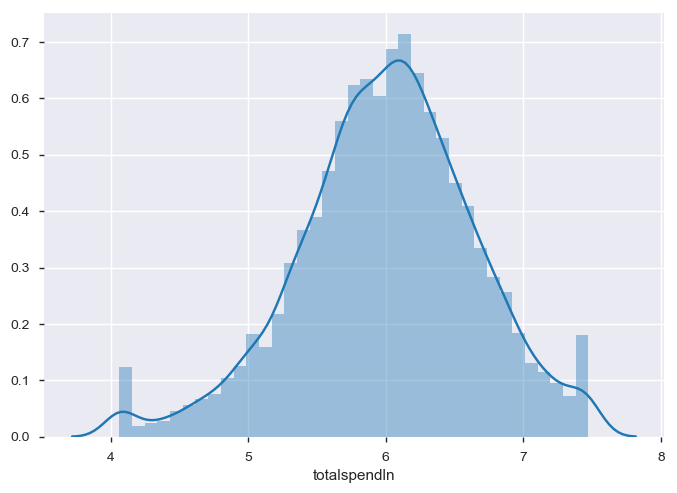

In [153]:
sns.distplot(dfreg['totalspendln'])

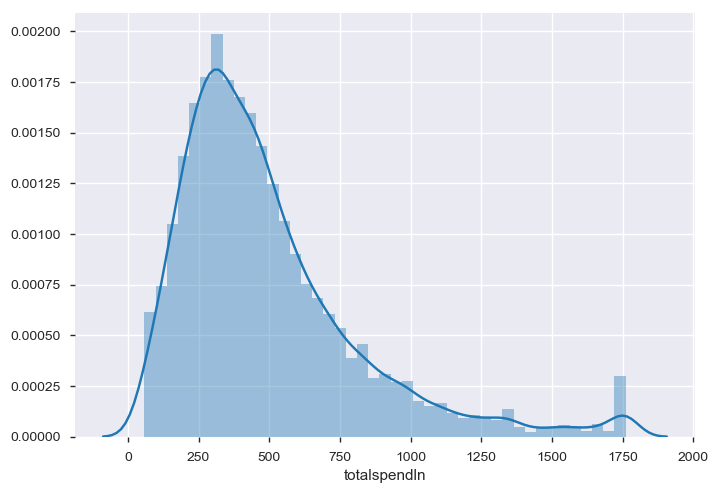

In [154]:
sns.distplot(np.exp(dfreg['totalspendln']))

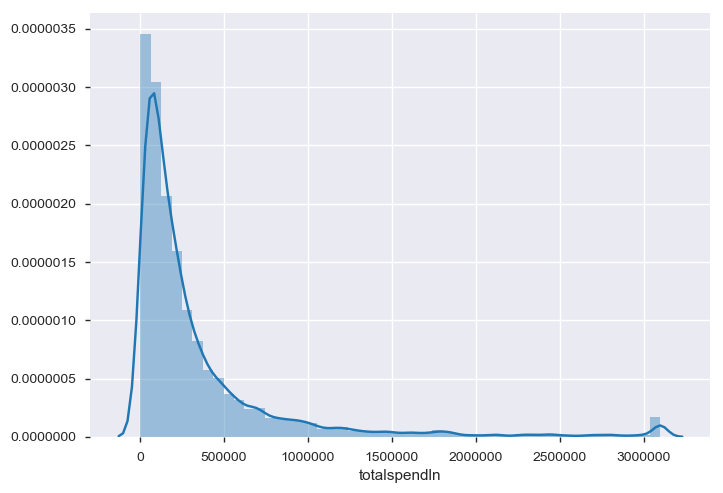

In [157]:
sns.distplot(np.exp(dfreg['totalspendln'])**2)

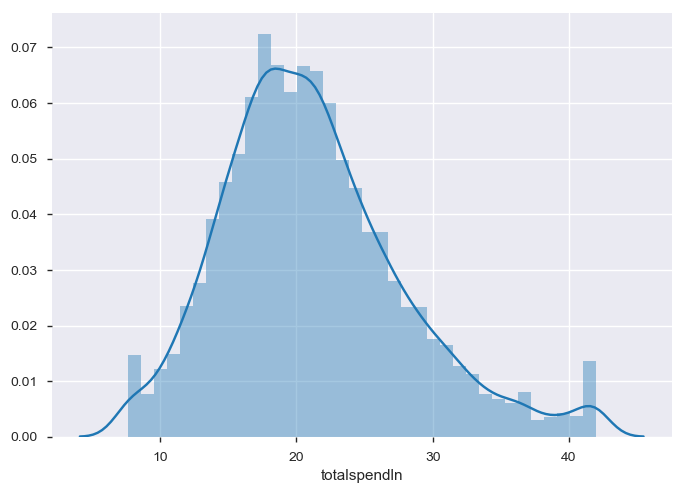

In [158]:
sns.distplot(np.exp(dfreg['totalspendln'])**0.5)

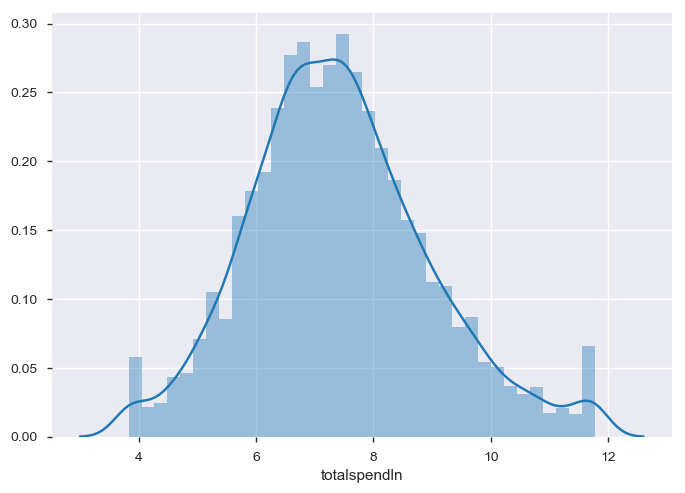

In [159]:
sns.distplot(np.exp(dfreg['totalspendln'])**0.33)

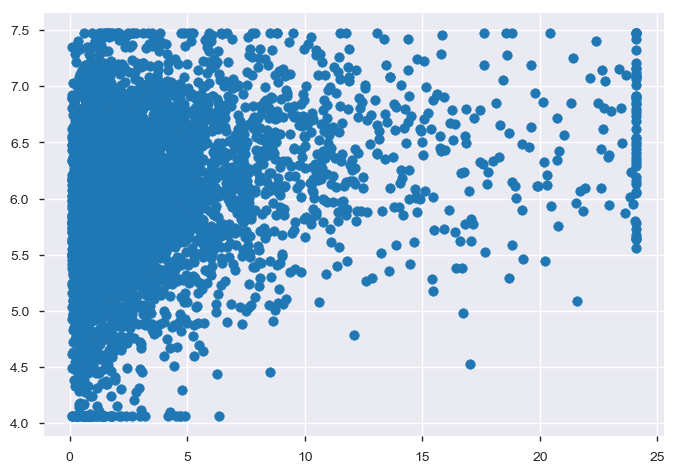

In [160]:
x=dfreg['othdebt']
y=dfreg['totalspendln']
plt.scatter(x,y)

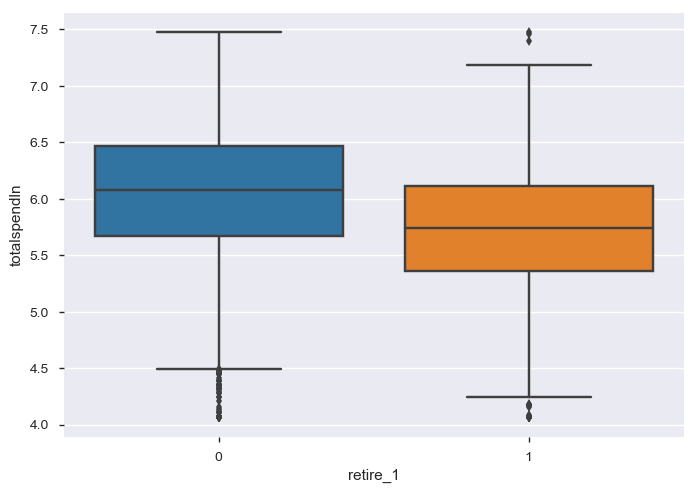

In [162]:
sns.boxplot(x='retire_1',y='totalspendln',data=dfreg)

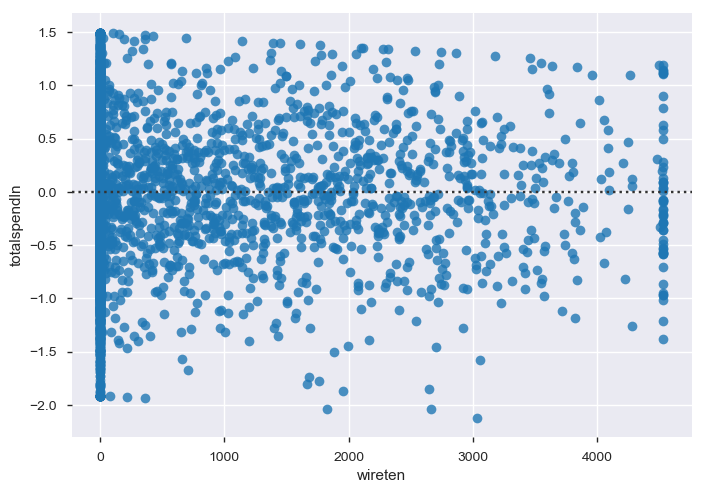

In [165]:
sns.residplot(dfreg['wireten'],dfreg['totalspendln'])

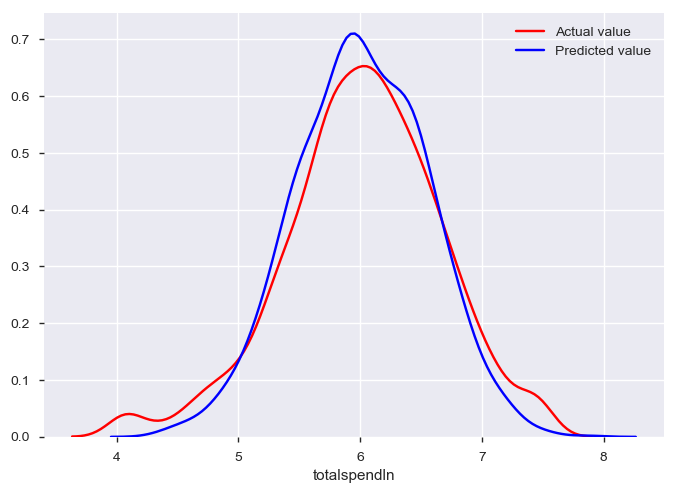

In [196]:
ax1=sns.distplot(test_y,hist=False,color='r',label='Actual value')
sns.distplot(predictions,hist=False,color='b',label='Predicted value',ax=ax1)

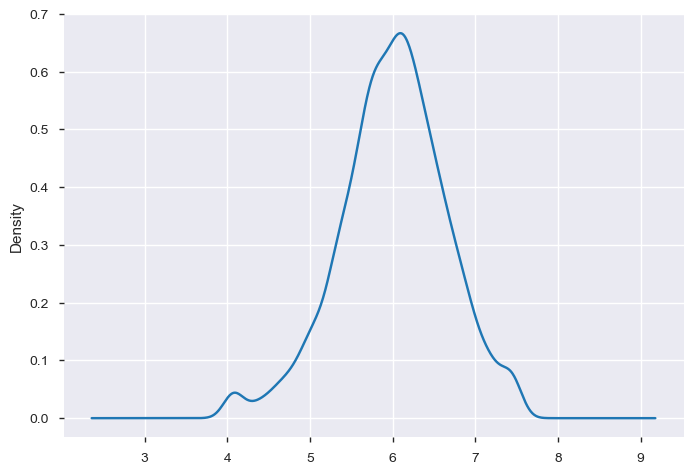

In [204]:
ser=dfreg['totalspendln']
ser.plot.kde()